In [1]:
import torchtrainer
import torch
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# instanciando o modelo
model_layers = (1, 1, 1)
model_channels = (64, 64, 64)
model = torchtrainer.models.resunet.ResUNetV2((8,), (1,), (64,))
# carregando o state_dict
baseline_state_dict = torch.load('./unetv2_baseline/checkpoint_best.pth')['model']
model.load_state_dict(baseline_state_dict)
model.eval();

In [3]:
valid_imgs = ['Experiment #1 (adults set #1)_20x_batch1 - Superfical layers@69-Image 1-20X.tiff', 
              'Experiment #1 (adults set #1)_20x_batch1 - Superfical layers@40-Image 2-20X.tiff', 
              'Experiment #1 (adults set #1)_20x_batch1 - Superfical layers@68-Image 2-20X.tiff']

In [4]:
def dataset_stats(img_dir):
    '''Calcula as estatísticas da base para fazer o zscore'''
    dataset_pixels = []
    for fname in os.listdir(img_dir):
        img = np.asarray(Image.open(f'{img_dir}/{fname}'), dtype=np.float32)
        dataset_pixels += list(img.reshape(-1))
    dataset_pixels = np.array(dataset_pixels)

    return dataset_pixels.mean(), dataset_pixels.std()

def zscore(img, ORIG_MEAN, ORIG_STD):
    return torch.tensor(((img-ORIG_MEAN))/ORIG_STD, dtype=torch.float32)

tensor(16.1984) tensor(-1.4705) torch.Size([1, 1, 1104, 1376])


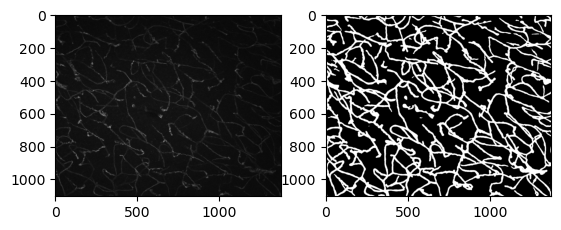

In [7]:
data_path = './data/original_images'
ORIG_MEAN, ORIG_STD = dataset_stats(data_path)
all_images = os.listdir(data_path)

for fname in valid_imgs:
    img = zscore(np.asarray(Image.open(f'./data/original_images/{fname}')), ORIG_MEAN, ORIG_STD)
    #img = np.asarray(Image.open(f'./data/original_images/{fname}'))
    img = np.expand_dims(img, axis=0)
    img = np.expand_dims(img, axis=0)
    img_tensor = torch.tensor(img, dtype=torch.float32)
    print(torch.max(img_tensor), torch.min(img_tensor), img_tensor.shape)
    output = model(img_tensor)
    seg = torch.argmax(output, dim=1)[0]

    plt.subplot(1, 2, 1)
    plt.imshow(img[0, 0], cmap='gray')
    plt.subplot(1, 2, 2)
    plt.imshow(seg.detach().numpy(), cmap='gray')
    plt.show()
    break